#**Name :** Pawan Gosavi
#**Class :** FY MSc IT Part I
#**Roll No. :** 01

# **BDA - Practical No. 06**

## **P6.1**

## **Aim :** Regression Model.

Import a data from web storage. Name the dataset and now do Logistic Regression to find out relation between variables that are affecting the admission of a student in an institute based on his or her GRE score, GPA obtained and rank of the student. Also check the model is fit or not. require (foreign), require(MASS).

### Import necessary libraries

In [1]:
# Numerical computing libraries

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

### Source Data

Download Data From : https://stats.idre.ucla.edu/stat/data/binary.csv

Create one Filder Called "python" in Your Google Drive & Save the CSV File in that Folder.

Mount Your Google Drive & Copy Path of Your File.

In [2]:
#from google.colab import drive
#drive.mount("/content/drive")

### Loading Data

In [3]:
# raw_data = pd.read_csv('binary.csv')
# raw_data.columns
# As we import the data, we rename the "Rank" column to "Prestige" to avoid confusion with the rank method of pandas
df = pd.read_csv('/content/drive/MyDrive/python/binary.csv', 
                       header = 0, names = ["Admit", 'GRE', 'GPA', 'Prestige'])

df.head()

,Admit,GRE,GPA,Prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# Verifying File

df.columns

Index(['Admit', 'GRE', 'GPA', 'Prestige'], dtype='object')

### Initial Exploratory Data Analysis

In [5]:
# Basic summary of the data
df.describe()

,Admit,GRE,GPA,Prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
# Generate a cross-tabulation (frequency table by default) of the factors; here we use prestige
pd.crosstab(df['Admit'], df['Prestige'], rownames=['Admission'])

Prestige,1,2,3,4
Admission,,,,
0,28,97,93,55
1,33,54,28,12


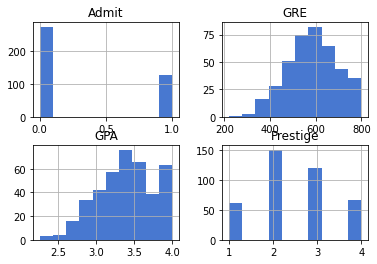

In [7]:
# Generate histograms
sns.set_color_codes('muted')
df.hist(color='b')
plt.show()

### Preprocessing the Data

In [8]:
# Dummy code the rank variable
dummy_ranks = pd.get_dummies(df['Prestige'], prefix="Prestige")
dummy_ranks.head()

,Prestige_1,Prestige_2,Prestige_3,Prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [9]:
columns1 = ['Admit', 'GRE', 'GPA']
data1 = df[columns1]
columns2 = ['Prestige_1','Prestige_2','Prestige_3']
data2 = dummy_ranks[columns2]
data = pd.merge(data1, data2, how="outer", left_index=True, right_index=True)
data

,Admit,GRE,GPA,Prestige_1,Prestige_2,Prestige_3
0,0,380,3.61,0,0,1
1,1,660,3.67,0,0,1
2,1,800,4.00,1,0,0
3,1,640,3.19,0,0,0
4,0,520,2.93,0,0,0
...,...,...,...,...,...,...
395,0,620,4.00,0,1,0
396,0,560,3.04,0,0,1
397,0,460,2.63,0,1,0
398,0,700,3.65,0,1,0


### Logistic Regression

In [10]:
# Separate independent and dependent variables
X = df.iloc[:,1:]
y = data['Admit']

data.index

RangeIndex(start=0, stop=400, step=1)

In [11]:
# Create a logistic regression model
initial = LogisticRegression(C = 1000, random_state=0)
initial.fit(X,y)

LogisticRegression(C=1000, random_state=0)

In [12]:
# Check model accuracy
print("Accuracy Score:", initial.score(X,y))

Accuracy Score: 0.705


In [13]:
# What percentage of students actually got into grad school
print("Actual probability of admission:", y.mean())

Actual probability of admission: 0.3175


In [14]:
# View coefficients
column_names = list(X.columns)
coefficients = np.transpose(initial.coef_)

intercept = initial.intercept_

Coeffs = pd.DataFrame(coefficients, column_names, columns=['Coefficients'])
Coeffs.append(pd.DataFrame(intercept,['Intercept'], columns=['Coefficients']))

,Coefficients
GRE,0.002294
GPA,0.776961
Prestige,-0.560021
Intercept,-3.449395


### Modeling Using a Training and a Test Set

In [15]:
# Split data into training and test sets, using 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# Fit the logistic regression with lambda = 10^-3
lr = LogisticRegression(C = 1000, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, random_state=0)

In [17]:
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1000, multi_class='ovr', n_jobs=1, random_state=0,
                   solver='liblinear')

In [18]:
# View predictions
predicted = lr.predict(X_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0]


In [19]:
# View class probabilities
probabilities = lr.predict_proba(X_test)
print(probabilities)

[[0.6366816  0.3633184 ]
 [0.84997442 0.15002558]
 [0.8637784  0.1362216 ]
 [0.79976519 0.20023481]
 [0.61841596 0.38158404]
 [0.66519788 0.33480212]
 [0.91007232 0.08992768]
 [0.7186239  0.2813761 ]
 [0.83686113 0.16313887]
 [0.60054624 0.39945376]
 [0.84520474 0.15479526]
 [0.72036368 0.27963632]
 [0.50475885 0.49524115]
 [0.69425588 0.30574412]
 [0.30855068 0.69144932]
 [0.9106249  0.0893751 ]
 [0.30293358 0.69706642]
 [0.51530521 0.48469479]
 [0.39804286 0.60195714]
 [0.8301134  0.1698866 ]
 [0.77915763 0.22084237]
 [0.59551664 0.40448336]
 [0.65949633 0.34050367]
 [0.7920674  0.2079326 ]
 [0.63053828 0.36946172]
 [0.85297681 0.14702319]
 [0.5435754  0.4564246 ]
 [0.78849712 0.21150288]
 [0.44193928 0.55806072]
 [0.89942071 0.10057929]
 [0.79589227 0.20410773]
 [0.49269275 0.50730725]
 [0.76514626 0.23485374]
 [0.72413913 0.27586087]
 [0.59477453 0.40522547]
 [0.78227359 0.21772641]
 [0.51638167 0.48361833]
 [0.56449441 0.43550559]
 [0.86841646 0.13158354]
 [0.69092521 0.30907479]


### Model Evaluation

In [20]:
# Check accuracy
print("Accuracy Score:", metrics.accuracy_score(y_test, predicted))

Accuracy Score: 0.7333333333333333


### Performance Visualization

In [21]:
print("\nClassification Report\n")
print(classification_report(y_test, predicted))


Classification Report

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        82
           1       0.71      0.26      0.38        38

    accuracy                           0.73       120
   macro avg       0.73      0.61      0.61       120
weighted avg       0.73      0.73      0.69       120



In [22]:
cm = confusion_matrix(y_test, predicted)

print("\nConfusion Matrix\n")
print("TP\t", cm[0][0], "\tFP\t", cm[0][1], "\n")
print("FN\t", cm[1][0], "\tTN\t", cm[1][1])


Confusion Matrix

TP	 78 	FP	 4 

FN	 28 	TN	 10


### Plotting the ROC Curve

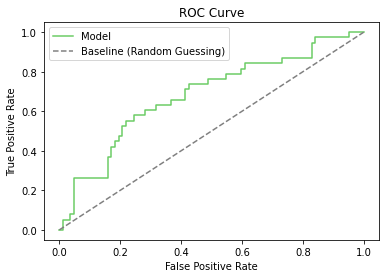

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities[:,1])

results = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

plt.plot(fpr,tpr, color='g', label="Model")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline (Random Guessing)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
print("Area Under the Curve:", metrics.roc_auc_score(y_test, probabilities[:,1]))

Area Under the Curve: 0.6813222079589218


### Checking Model Prediction Performance

In [25]:
fivefold = cross_val_score(lr, X, y, scoring='accuracy', cv=5)
print("\nScore per fold:", fivefold)
print("\nMean score:", fivefold.mean())
print("\nStandard deviation:", fivefold.std())


Score per fold: [0.7125 0.7375 0.7    0.6875 0.7   ]

Mean score: 0.7075000000000001

Standard deviation: 0.016955824957813198


### Improving the Model - Feature Scaling


In [26]:
# Isolate columns to scale
toscale = X[['GRE','GPA']].astype(float)
scaledX = preprocessing.scale(toscale)
scaleddata = pd.DataFrame(scaledX, columns=['GRE','GPA'])

In [27]:
# Join scaled data with categorical rank columns
scaledX = scaleddata.join(data2)
scaledX.head()

,GRE,GPA,Prestige_1,Prestige_2,Prestige_3
0,-1.800263,0.579072,0,0,1
1,0.626668,0.736929,0,0,1
2,1.840134,1.605143,1,0,0
3,0.453316,-0.525927,0,0,0
4,-0.586797,-1.209974,0,0,0


In [28]:
improve1 = cross_val_score(lr, scaledX, y, scoring='accuracy', cv=5)
print("\nScore per fold:", improve1)
print("\nMean score:", improve1.mean())
print("\nStandard deviation:", improve1.std())


Score per fold: [0.7   0.75  0.7   0.675 0.7  ]

Mean score: 0.7050000000000001

Standard deviation: 0.024494897427831775


### Correcting for Class Imbalance

In [29]:
lrweighted = LogisticRegression(C = 1000, random_state=0, class_weight={0:0.505,1:0.495})

improve2 = cross_val_score(lrweighted, scaledX, y, scoring='accuracy', cv=5)
print("\nScore per fold:", improve2)
print("\nMean score:", improve2.mean())
print("\nStandard deviation:", improve2.std())


Score per fold: [0.7125 0.75   0.7    0.675  0.7   ]

Mean score: 0.7074999999999999

Standard deviation: 0.024494897427831775


### Hyperparameter Tuning

In [30]:
tens = [10**i for i in range(-5,6)]

for i in tens:
    if i == 1000:
        continue
    testlr = LogisticRegression(C = i, random_state=0, class_weight={0:0.505,1:0.495})
    testcrossval = cross_val_score(testlr, scaledX, y, scoring='accuracy', cv=5)
    print('\nFor C = {}:'.format(i))
    print('  Score per fold:', testcrossval)
    print('    Mean score:', testcrossval.mean())
    print('    Standard deviation:', testcrossval.std())


For C = 1e-05:
  Score per fold: [0.6875 0.6875 0.6875 0.675  0.675 ]
    Mean score: 0.6824999999999999
    Standard deviation: 0.006123724356957924

For C = 0.0001:
  Score per fold: [0.6875 0.6875 0.6875 0.675  0.675 ]
    Mean score: 0.6824999999999999
    Standard deviation: 0.006123724356957924

For C = 0.001:
  Score per fold: [0.6875 0.6875 0.6875 0.675  0.675 ]
    Mean score: 0.6824999999999999
    Standard deviation: 0.006123724356957924

For C = 0.01:
  Score per fold: [0.6875 0.6875 0.6875 0.675  0.675 ]
    Mean score: 0.6824999999999999
    Standard deviation: 0.006123724356957924

For C = 0.1:
  Score per fold: [0.725  0.6875 0.6875 0.6625 0.6625]
    Mean score: 0.685
    Standard deviation: 0.022912878474779203

For C = 1:
  Score per fold: [0.7375 0.7375 0.7    0.675  0.675 ]
    Mean score: 0.7049999999999998
    Standard deviation: 0.028062430400804566

For C = 10:
  Score per fold: [0.7125 0.7375 0.7    0.675  0.7   ]
    Mean score: 0.7050000000000001
    Standa

### Testing the Revised Model

In [31]:
# Create new train and test sets and fit our revised model to it
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaledX, y, test_size = 0.3, random_state = 0)

In [32]:
newlr = LogisticRegression(C = 1000, random_state=0, class_weight={0:0.505,1:0.495})
newlr.fit(X_train2, y_train2)

LogisticRegression(C=1000, class_weight={0: 0.505, 1: 0.495}, random_state=0)

In [33]:
LogisticRegression(C=1000, class_weight={0: 0.505, 1: 0.495}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1000, class_weight={0: 0.505, 1: 0.495}, multi_class='ovr',
                   n_jobs=1, random_state=0, solver='liblinear')

In [34]:
# Check for metrics on the new predicted probabilities
newpredictions = newlr.predict(X_test2)
newprobabilities = newlr.predict_proba(X_test2)

In [35]:
# Model Accuracy: how often is the classifier correct?
print("LR Model Accuracy : ", newlr.score(X_test2, y_test2))

LR Model Accuracy :  0.725


In [36]:
print("\nClassification Report\n")
print(metrics.classification_report(y_test2, newpredictions))


Classification Report

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        82
           1       0.67      0.26      0.38        38

    accuracy                           0.73       120
   macro avg       0.70      0.60      0.60       120
weighted avg       0.71      0.72      0.68       120



In [37]:
cm = confusion_matrix(y_test2, newpredictions)

print("\nConfusion Matrix\n")
print("TP\t", cm[0][0], "\tFP\t", cm[0][1], "\n")
print("FN\t", cm[1][0], "\tTN\t", cm[1][1])


Confusion Matrix

TP	 77 	FP	 5 

FN	 28 	TN	 10


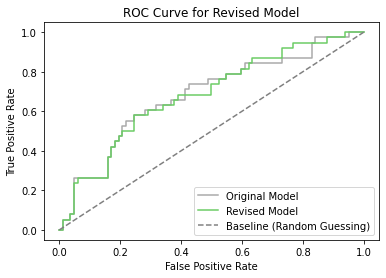

In [38]:
# Plot a new ROC curve for the revised model
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, newprobabilities[:,1])

results2 = pd.DataFrame({'False Positive Rate': fpr2, 'True Positive Rate': tpr2})

plt.plot(fpr,tpr,color='darkgray', label="Original Model")
plt.plot(fpr2,tpr2, color='g', label="Revised Model")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline (Random Guessing)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Revised Model')
plt.legend()
plt.show()

In [39]:
print("Area Under the Curve:", metrics.roc_auc_score(y_test2, newprobabilities[:,1]))

Area Under the Curve: 0.6819640564826701


## **P6.2**

## **Aim :** Multiple Regression Model.

### Import necessary libraries

In [40]:
# Numerical computing libraries

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn import metrics
import numpy as np

### Source Data

Download Data From : https://raw.githubusercontent.com/sharmaroshan/Graduate-Admissions-Analysis/master/Admission_Predict_Ver1.1.csv

Create one Filder Called "python" in Your Google Drive & Save the CSV File in that Folder.

Mount Your Google Drive & Copy Path of Your File.

In [41]:
#from google.colab import drive
#drive.mount("/content/drive")

### Loading Data

In [42]:
# raw_data = pd.read_csv('Admission_Predict_Ver1.1.csv')
# raw_data.columns
# As we import the data, we rename the "Rank" column to "Prestige" to avoid confusion with the rank method of pandas
df = pd.read_csv('/content/drive/MyDrive/python/Admission_Predict_Ver1.1.csv', encoding = 'utf-8')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [43]:
# Verifying File

df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### It is a good practice to shuffle the data to remove any kind of order effects in data.

In [45]:
df_shuffled = shuffle(df,random_state = 42)

In [46]:
df_shuffled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
361,362,334,116,4,4.0,3.5,9.54,1,0.93
73,74,314,108,4,4.5,4.0,9.04,1,0.84
374,375,315,105,2,2.0,2.5,7.65,0,0.39
155,156,312,109,3,3.0,3.0,8.69,0,0.77
104,105,326,112,3,3.5,3.0,9.05,1,0.74


In [47]:
DV = 'Chance of Admit '

### Splitting the DataFrame df_shuffled into feature variable(X) and dependent variable(y)

In [48]:
X = df_shuffled.drop(['Chance of Admit ','Serial No.'], axis=1)

In [49]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1


In [50]:
y = df_shuffled[DV]

In [51]:
y.head()

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
Name: Chance of Admit , dtype: float64

### Split X and y into training and testing sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [53]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
443,321,114,5,4.5,4.5,9.16,1
497,330,120,5,4.5,5.0,9.56,1
124,301,106,4,2.5,3.0,8.47,0
50,313,98,3,2.5,4.5,8.30,1
331,311,105,2,3.0,2.0,8.12,1


In [54]:
X_train.shape

(335, 7)

### Instantiating the Linear Regression model and fitting the model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
model.fit(X_train[['GRE Score']],y_train)

LinearRegression()

### Extracting the intercept(c) and the coefficient(m)

In [58]:
intercept = model.intercept_

In [59]:
intercept

-2.6151678753807013

In [60]:
coefficient = model.coef_

In [61]:
coefficient

array([0.01054397])

### Printing out the Equation (y = c + mx) in terms of Admit(y), intercept(c), coefficient(m) and x(GRE Score) 

In [62]:
print('Admit = {0:0.2f} + ({1:0.2f} x GRE Score)'.format(intercept,coefficient[0]))

Admit = -2.62 + (0.01 x GRE Score)


### Predicted Value

In [63]:
Admit = -2.62 + (0.01 * X_train['GRE Score'])

In [64]:
Admit.head()

443    0.59
497    0.68
124    0.39
50     0.51
331    0.49
Name: GRE Score, dtype: float64

### Generate predictions of the test data using the following

In [65]:
predictions = model.predict(X_test[['GRE Score']])

In [66]:
predictions.shape

(165,)

In [67]:
predictions

array([0.56911022, 0.62183005, 0.69563782, 0.55856625, 0.63237402,
       0.59019815, 0.82216543, 0.74835766, 0.65346195, 0.81162146,
       0.75890163, 0.59019815, 0.79053353, 0.79053353, 0.81162146,
       0.70618179, 0.85379733, 0.54802228, 0.68509386, 0.63237402,
       0.90651717, 0.8327094 , 0.77998956, 0.61128609, 0.8327094 ,
       0.54802228, 0.56911022, 0.8327094 , 0.71672576, 0.67454989,
       0.72726972, 0.67454989, 0.69563782, 0.50584641, 0.70618179,
       0.49530245, 0.70618179, 0.57965418, 0.69563782, 0.59019815,
       0.59019815, 0.70618179, 0.72726972, 0.88542923, 0.79053353,
       0.84325336, 0.90651717, 0.71672576, 0.63237402, 0.66400592,
       0.75890163, 0.66400592, 0.75890163, 0.52693435, 0.48475848,
       0.75890163, 0.67454989, 0.52693435, 0.72726972, 0.60074212,
       0.9276051 , 0.52693435, 0.74835766, 0.79053353, 0.60074212,
       0.70618179, 0.77998956, 0.93814907, 0.90651717, 0.79053353,
       0.69563782, 0.50584641, 0.8010775 , 0.72726972, 0.94869

### Using the pearson correlation coefficient to determine direction of the linear relationship between the dependent variable y and the predicted value of y which is the variable predictions in our case

ex: correlation_coeff, p_value = pearsonr(x,y). In the below code we access the 0th index as the correlation_coeff is the 1st element output for pearsonr(x,y).

Text(0.5, 1.0, 'Predicted vs Actual Values (r =0.80)')

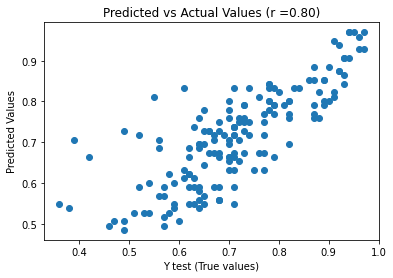

In [68]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (r ={0:0.2f})'.format(pearsonr(y_test,predictions)[0]))

### Residuals (difference between the true and predicted value)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


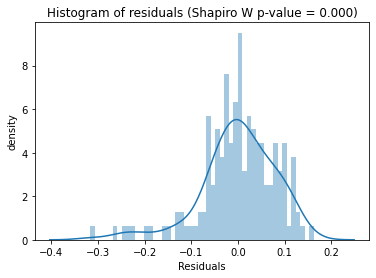

In [69]:
sns.distplot((y_test - predictions),bins = 50)
plt.xlabel('Residuals')
plt.ylabel('density')
plt.title('Histogram of residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test-predictions)[1]))
plt.show()

In [70]:
shap_w, shap_p = shapiro(y_test - predictions)

In [71]:
shap_p

2.519790541555267e-06

#### Computing the metrics for mean absolute error, mean squared error, root mean squared error, and R-squared, and put them into a DataFrame

In [72]:
metrics_df = pd.DataFrame({'Metric':['MAE','MSE','RMSE','R-Squared'],
                          'Value':[metrics.mean_absolute_error(y_test,predictions),
                                   metrics.mean_squared_error(y_test,predictions),
                                   np.sqrt(metrics.mean_squared_error(y_test,predictions)),
                                   metrics.explained_variance_score(y_test,predictions)]}).round(3)

In [73]:
metrics_df

,Metric,Value
0,MAE,0.059
1,MSE,0.006
2,RMSE,0.080
3,R-Squared,0.629


***Mean absolute error (MAE)*** is the average absolute difference between the predicted values and the actual values. 

***Mean squared error (MSE)*** is the average of the squared differences between the predicted and actual values. 

***Root mean squared error (RMSE)*** is the square root of the MSE. 

***R-squared*** tells us the proportion of variance in the dependent variable that can be explained by the model. Thus, in this simple linear regression model, **GRE Score** explained 62.9% of the variance in Admit (The meaning of that is 62.9% of the times the **Admit** will change with the change of **GRE Score**). Additionally, our predictions were within ± 0.059 **Admit score**.

### Instantiating the Multiple Linear Regression model and fitting the model

In [74]:
model = LinearRegression()

In [75]:
model.fit(X_train,y_train)

LinearRegression()

### Calculate the Model Intercept and Coefficient --Regression Coefficient

In [76]:
intercept = model.intercept_

In [77]:
intercept

-1.424254144302783

In [78]:
coefficients = model.coef_

In [79]:
coefficients

array([0.00217167, 0.00294465, 0.00431416, 0.00161238, 0.01659515,
       0.12281766, 0.02050198])

### Printing the equation using the coefficients we got above

In [80]:
print('Admit_Predict = {0:0.4f} + ({1:0.4f} x GRE Score) + ({2:0.4f} x TOEFL Score) + ({3:0.4f} x University Rating) + ({4:0.4f} x SOP) +({5:0.4f} x LOR) + ({6:0.4f} x CGPA) +({7:0.4f} x Research)'.format(intercept, 
             coefficients[0], 
             coefficients[1], 
             coefficients[2], 
             coefficients[3], 
             coefficients[4], 
             coefficients[5], 
             coefficients[6]))

Admit_Predict = -1.4243 + (0.0022 x GRE Score) + (0.0029 x TOEFL Score) + (0.0043 x University Rating) + (0.0016 x SOP) +(0.0166 x LOR) + (0.1228 x CGPA) +(0.0205 x Research)


### 9. Implementing the above equation and predicting the Admit Scores

In [81]:
Admit_Predict = -1.4243 + (0.0022 * X_train['GRE Score']) + (0.0029 * X_train['TOEFL Score']) + (0.0043 * X_train['University Rating']) + (0.0016 * X_train['SOP']) +(0.0166 * X_train['LOR ']) + (0.1228 * X_train['CGPA']) +(0.0205 * X_train['Research'])

In [82]:
Admit_Predict.head()

443    0.861248
497    0.955868
124    0.656416
50     0.679840
331    0.628636
dtype: float64

In [83]:
predictions = model.predict(X_test)

In [84]:
predictions.shape

(165,)

In [85]:
predictions

array([0.54539918, 0.55363752, 0.78000432, 0.597551  , 0.64566267,
       0.68833295, 0.82664645, 0.68428919, 0.65744214, 0.81637454,
       0.80592038, 0.69639124, 0.73953556, 0.72629543, 0.91058275,
       0.65096547, 0.86424101, 0.55253423, 0.56833614, 0.69443069,
       0.93981603, 0.82809052, 0.7057749 , 0.68265075, 0.84866986,
       0.41677175, 0.45426869, 0.78282754, 0.74439537, 0.62941571,
       0.60821993, 0.71991221, 0.65369032, 0.47574244, 0.56190713,
       0.41525819, 0.70733081, 0.61018855, 0.5510159 , 0.59136738,
       0.58473005, 0.64840503, 0.66023105, 0.8882523 , 0.86243497,
       0.86309401, 0.91663565, 0.72721531, 0.69744991, 0.71971577,
       0.68922378, 0.56502979, 0.71907273, 0.48716266, 0.46391183,
       0.58724119, 0.63811268, 0.52989804, 0.69304485, 0.52932209,
       0.96703953, 0.50234456, 0.760185  , 0.80683706, 0.6320383 ,
       0.70421576, 0.65733996, 0.95995125, 0.90553398, 0.81891241,
       0.63092162, 0.51734089, 0.81072184, 0.64351458, 0.93423

### Plotting the predicted versus actual values on a scatterplot

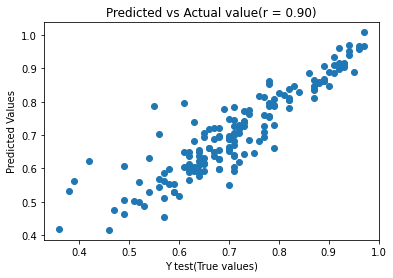

In [86]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test(True values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual value(r = {0:0.2f})'.format(pearsonr(y_test,predictions)[0]))
plt.show()

### 10. Plotting the residuals

As discussed in the Introduction section, A **Residual** in simple terms is the difference between the Actual and Predicted value of the dependent variable.

In [87]:
import seaborn as sns
from scipy.stats import shapiro

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


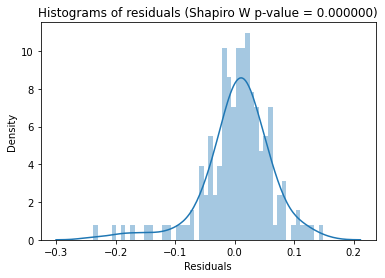

In [88]:
sns.distplot((y_test- predictions),bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histograms of residuals (Shapiro W p-value = {0:03f})'.format(shapiro(y_test-predictions)[1]))
plt.show()

### Computing the metrics for mean absolute error, mean squared error, root mean squared error, and R-squared to determine the model performance

In [89]:
metrics_df = pd.DataFrame({'Metric':['MAE','MSE','RMSE','R-Squared'],
                           'Value':[metrics.mean_absolute_error(y_test,predictions),
                                    metrics.mean_squared_error(y_test,predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test,predictions)),
                                    metrics.explained_variance_score(y_test,predictions)]}).round(3)

In [90]:
metrics_df

,Metric,Value
0,MAE,0.041
1,MSE,0.003
2,RMSE,0.058
3,R-Squared,0.809
